In [ ]:
# https://mp.weixin.qq.com/s/V0MlmsoZdcRIZcxsRgAzuA

'''
论文地址：
https://arxiv.org/abs/2311.11793参考链接：
[1]https://www.quantamagazine.org/computer-scientists-establish-the-best-way-to-traverse-a-graph-20241025/
[2]https://inference-review.com/article/the-man-who-carried-computer-science-on-his-shoulders
'''

In [ ]:
# 模拟代码

import heapq

def dijkstra(graph, start):
    # 初始化距离字典，所有节点的距离都设置为无穷大
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0  # 起点到起点的距离为0
    # 使用优先队列（最小堆）来存储和获取当前未访问节点中距离最小的节点
    priority_queue = [(0, start)]
    
    while priority_queue:
        # 获取当前距离最小的节点
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # 如果这个节点已经访问过，则跳过
        if current_distance > distances[current_node]:
            continue
        
        # 遍历当前节点的邻居
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            
            # 如果找到一条更短的路径，则更新距离并添加到优先队列中
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

# 示例图，使用字典表示，键是节点，值是另一个字典，表示邻居节点及其权重
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# 使用Dijkstra算法计算从节点'A'到其他所有节点的最短路径
shortest_paths = dijkstra(graph, 'A')
print(shortest_paths)

'''
在这个例子中，我们定义了一个图graph，它是一个字典，其中包含了四个节点（A、B、C、D）和它们之间的边以及权重。然后我们调用dijkstra函数来计算从节点’A’到图中所有其他节点的最短路径。

运行这段代码，你将得到从节点’A’到其他节点的最短路径长度。
'''

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [2]:
import heapq

def dijkstra(graph, start):
    # 初始化距离字典，所有节点的距离都设置为无穷大
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0  # 起点到起点的距离为0
    # 使用优先队列（最小堆）来存储和获取当前未访问节点中距离最小的节点
    priority_queue = [(0, start)]
    # 记录最短路径
    previous_nodes = {node: None for node in graph}
    
    while priority_queue:
        # 获取当前距离最小的节点
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # 遍历当前节点的邻居
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            
            # 如果找到一条更短的路径，则更新距离并添加到优先队列中
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances, previous_nodes

# 示例图，使用字典表示，键是节点，值是另一个字典，表示邻居节点及其权重
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# 使用Dijkstra算法计算从节点'A'到其他所有节点的最短路径
distances, previous_nodes = dijkstra(graph, 'A')

# 打印结果
print("最短距离：", distances)
print("前驱节点：", previous_nodes)

# 为了图解，可以打印出路径
def print_path(previous_nodes, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = previous_nodes[current]
    path.append(start)
    path.reverse()
    return ' -> '.join(path)

# 打印从A到D的最短路径
print("从A到D的最短路径：", print_path(previous_nodes, 'A', 'D'))


最短距离： {'A': 0, 'B': 1, 'C': 3, 'D': 4}
前驱节点： {'A': None, 'B': 'A', 'C': 'B', 'D': 'C'}
从A到D的最短路径： A -> B -> C -> D


NameError: name 'path' is not defined

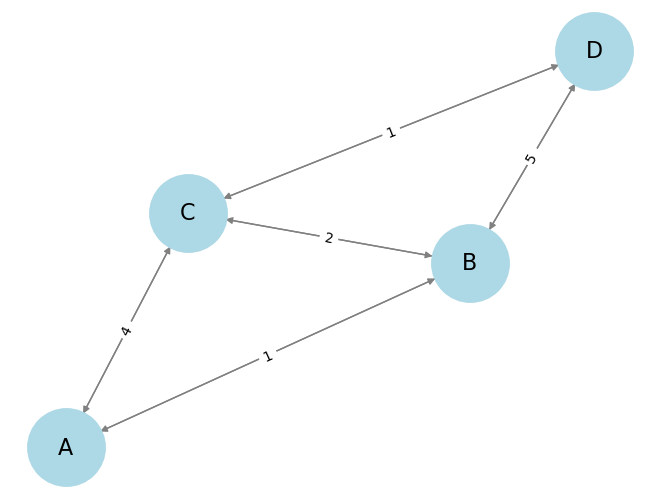

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建一个空的有向图
G = nx.DiGraph()

# 添加节点和边到图中
for node in graph:
    G.add_node(node)
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)

# 绘制图
pos = nx.spring_layout(G)  # 用于计算节点的位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', linewidths=2, font_size=16)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# 高亮显示最短路径
path_edges = list(zip(['A'] + list(path), path))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.show()


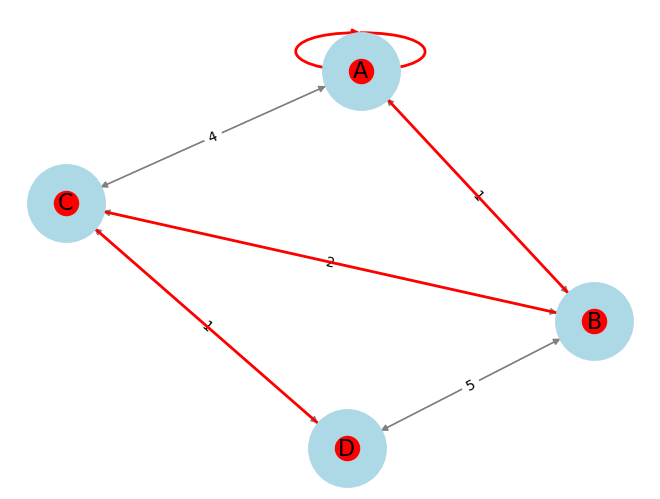

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# 示例图
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# 创建一个空的有向图
G = nx.DiGraph()

# 添加节点和边到图中
for node in graph:
    G.add_node(node)
    for neighbor, weight in graph[node].items():
        G.add_edge(node, neighbor, weight=weight)

# 绘制图
pos = nx.spring_layout(G)  # 用于计算节点的位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', linewidths=2, font_size=16)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# 假设我们知道最短路径是 A -> B -> C -> D
path = ['A', 'B', 'C', 'D']
path_edges = list(zip(['A'] + path[:-1], path))

# 高亮显示最短路径
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.show()


Dijkstra算法是一种用于在图中寻找最短路径的算法，它适用于带有非负权重的图。以下是Dijkstra算法的时间复杂度分析：
1. **初始化**：算法开始时，需要初始化两个集合（已处理节点集合和未处理节点集合），以及一个用于存储从起点到每个节点最短距离的数组。初始化的时间复杂度是O(V)，其中V是图中节点的数量。
2. **主循环**：
   - 算法的主循环会执行V-1次，每次从未处理节点集合中选出距离起点最近的节点，并将其从未处理集合移动到已处理集合。
   - 在每次迭代中，算法需要更新所有相邻节点的最短路径估计。在最坏的情况下，这需要检查所有边，即O(E)，其中E是图中边的数量。
3. **优先队列**：
   - 通常，为了高效地选出距离起点最近的节点，会使用一个优先队列（例如二叉堆）。在优先队列中，插入和删除操作的时间复杂度是O(log V)。
   - 因此，对于每个节点，都需要进行一次插入和一次删除操作，总的时间复杂度是O(V log V)。
综上所述，Dijkstra算法的总时间复杂度是O(V log V + E)。在稠密图中（即边的数量接近于V^2），E接近于V^2，此时算法的时间复杂度可以近似为O(V^2)。而在稀疏图中（即边的数量接近于V），算法的时间复杂度主要取决于O(V log V)。
请注意，这个时间复杂度是基于使用二叉堆作为优先队列的情况。如果使用斐波那契堆，可以将时间复杂度改进到O(V log V + E)，其中E是边的数量，这在某些情况下可以更高效，尤其是当边的数量远大于节点的数量时。
